In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import re
import missingno as mso
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [5]:
data=pd.read_csv("/content/seattle-weather.csv")

In [6]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [7]:
data.shape

(1461, 6)

In [8]:
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

<Axes: xlabel='weather', ylabel='count'>

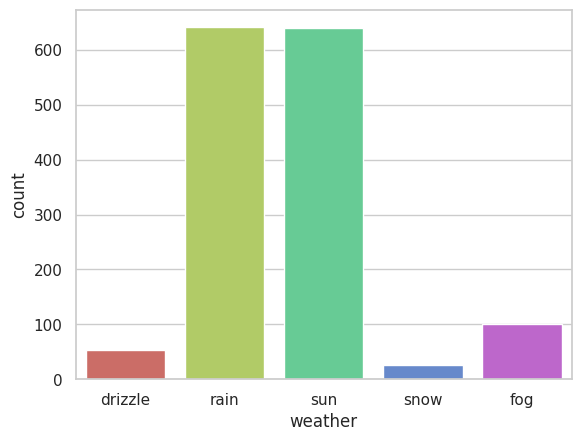

In [9]:
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
sns.countplot(x="weather", data=data, palette="hls")

In [10]:
# Counting occurrences of each weather type
count_rain = len(data[data.weather == "rain"])
count_sun = len(data[data.weather == "sun"])
count_drizzle = len(data[data.weather == "drizzle"])
count_snow = len(data[data.weather == "snow"])
count_fog = len(data[data.weather == "fog"])

# Calculating and printing the percentages
total_entries = len(data.weather)
percent_rain = (count_rain / total_entries) * 100
percent_sun = (count_sun / total_entries) * 100
percent_drizzle = (count_drizzle / total_entries) * 100
percent_snow = (count_snow / total_entries) * 100
percent_fog = (count_fog / total_entries) * 100

print("Percent of Rain: {:.2f}%".format(percent_rain))
print("Percent of Sun: {:.2f}%".format(percent_sun))
print("Percent of Drizzle: {:.2f}%".format(percent_drizzle))
print("Percent of Snow: {:.2f}%".format(percent_snow))
print("Percent of Fog: {:.2f}%".format(percent_fog))

Percent of Rain: 43.87%
Percent of Sun: 43.81%
Percent of Drizzle: 3.63%
Percent of Snow: 1.78%
Percent of Fog: 6.91%


In [11]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


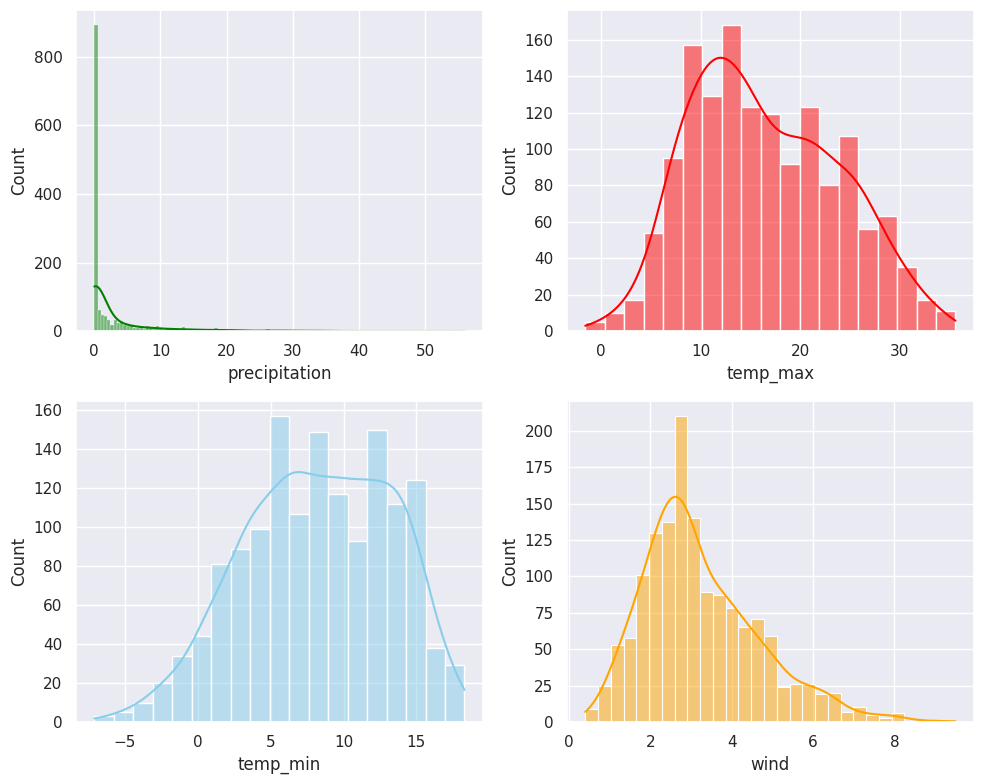

In [12]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=data, x="precipitation", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data, x="temp_max", kde=True, ax=axs[0, 1], color='red')
sns.histplot(data=data, x="temp_min", kde=True, ax=axs[1, 0], color='skyblue')
sns.histplot(data=data, x="wind", kde=True, ax=axs[1, 1], color='orange')

plt.tight_layout()
plt.show()

To check skewness we generate this

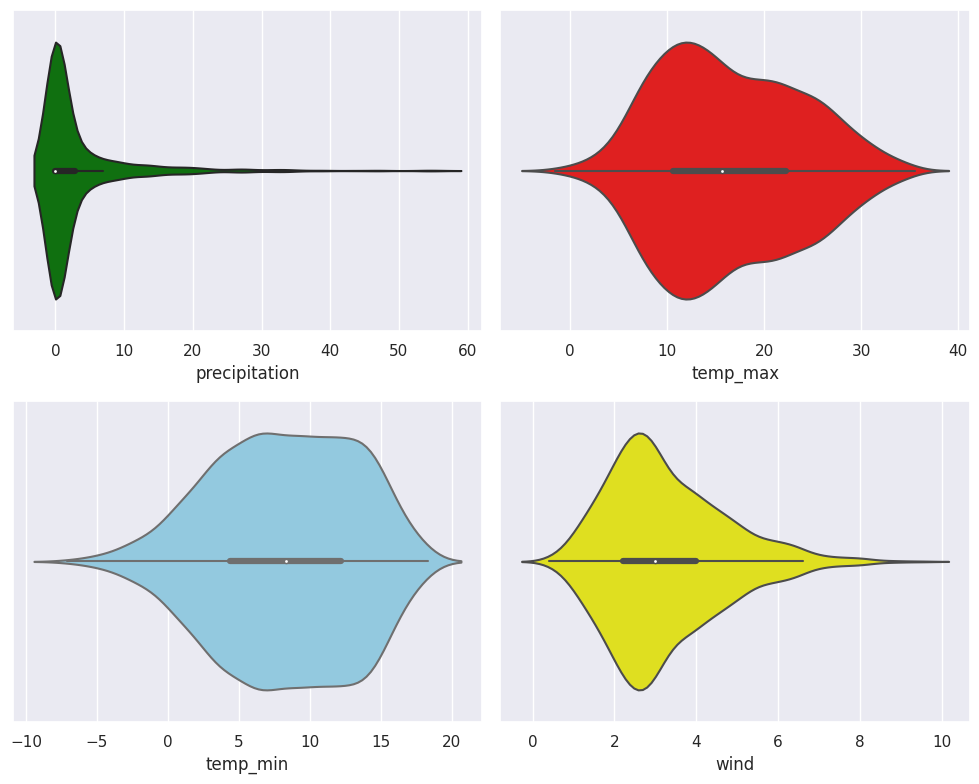

In [13]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.violinplot(data=data, x="precipitation", kde=True, ax=axs[0, 0], color='green')
sns.violinplot(data=data, x="temp_max", kde=True, ax=axs[0, 1], color='red')
sns.violinplot(data=data, x="temp_min", kde=True, ax=axs[1, 0], color='skyblue')
sns.violinplot(data=data, x="wind", kde=True, ax=axs[1, 1], color='yellow')

plt.tight_layout()
plt.show()

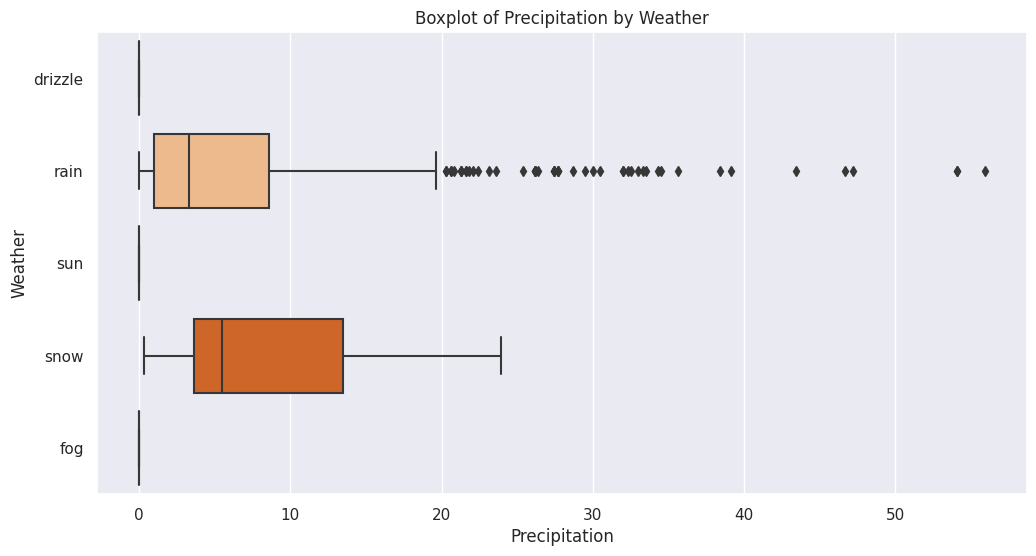

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="precipitation", y="weather", data=data, palette="Oranges")

plt.xlabel("Precipitation")
plt.ylabel("Weather")
plt.title("Boxplot of Precipitation by Weather")

plt.show()

Outlier check

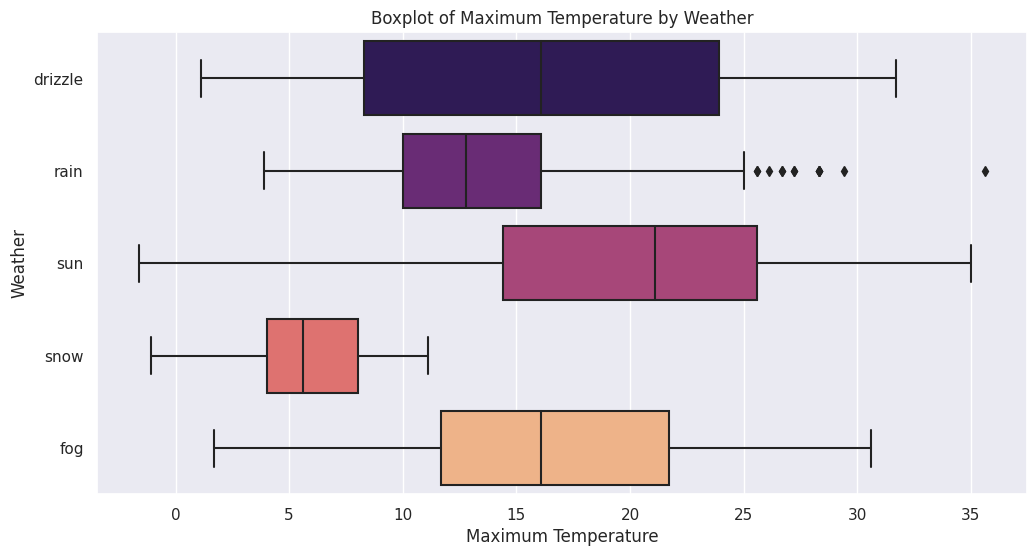

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="temp_max", y="weather", data=data, palette="magma")

plt.xlabel("Maximum Temperature")
plt.ylabel("Weather")
plt.title("Boxplot of Maximum Temperature by Weather")

plt.show()

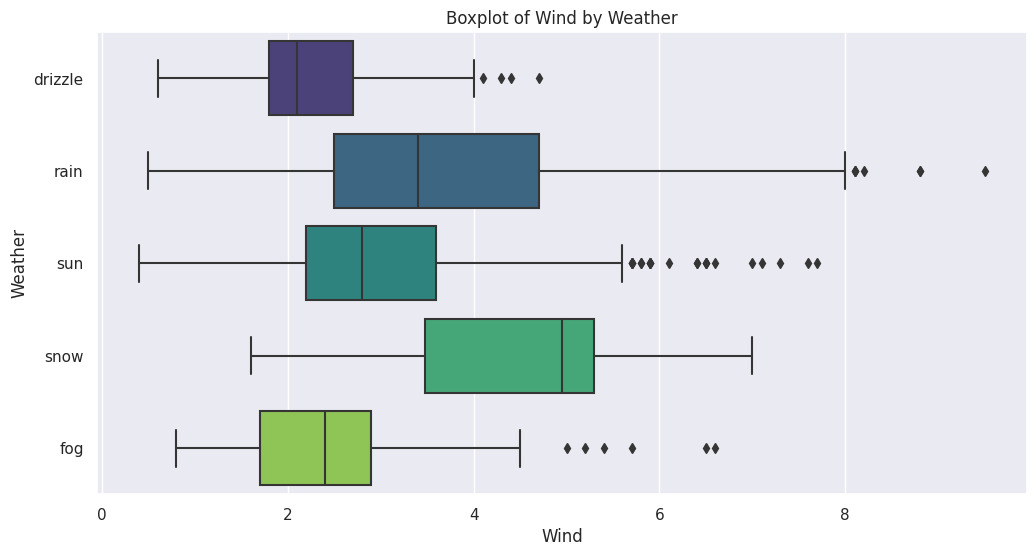

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="wind", y="weather", data=data, palette="viridis")

plt.xlabel("Wind")
plt.ylabel("Weather")
plt.title("Boxplot of Wind by Weather")

plt.show()

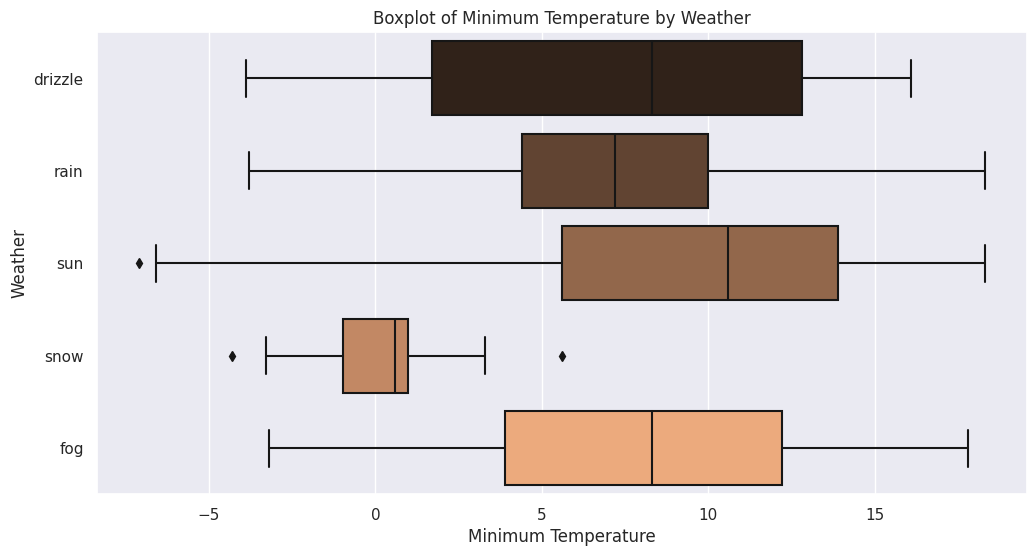

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="temp_min", y="weather", data=data, palette="copper")

plt.xlabel("Minimum Temperature")
plt.ylabel("Weather")
plt.title("Boxplot of Minimum Temperature by Weather")

plt.show()

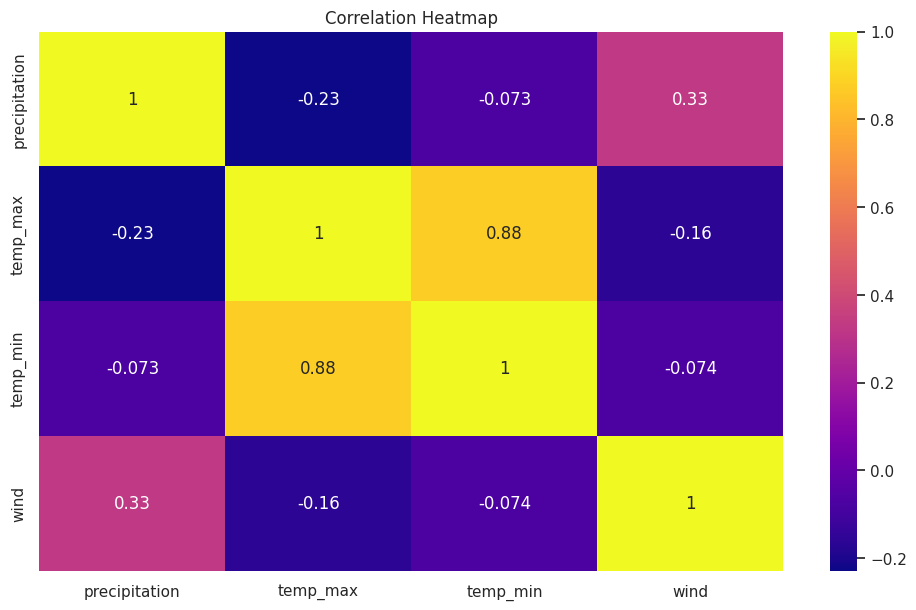

In [18]:
plt.figure(figsize=(12, 7))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='plasma')

plt.title("Correlation Heatmap")
plt.show()

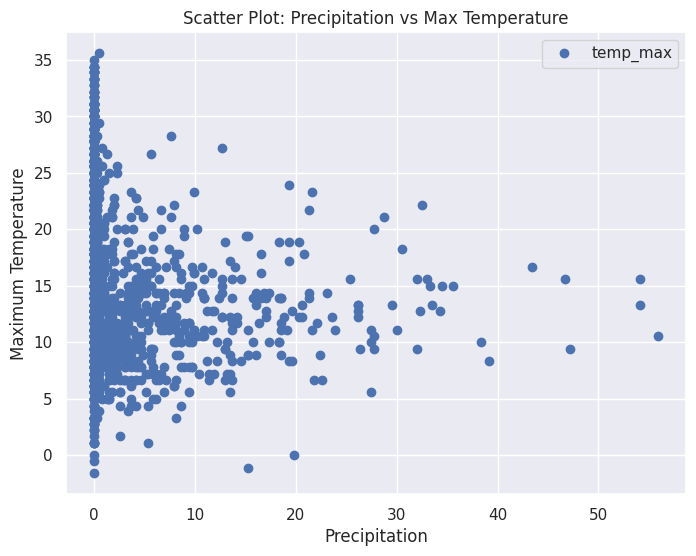

Pearson correlation coefficient: -0.22855481643297046
T-test p-value: 0.0


In [19]:
data.plot(x="precipitation", y="temp_max", style='o', figsize=(8, 6))
plt.xlabel("Precipitation")
plt.ylabel("Maximum Temperature")
plt.title("Scatter Plot: Precipitation vs Max Temperature")
plt.show()

pearson_corr = data["precipitation"].corr(data["temp_max"])
t_statistic, p_value = stats.ttest_ind(data["precipitation"], data["temp_max"])

print("Pearson correlation coefficient:", pearson_corr)
print("T-test p-value:", p_value)

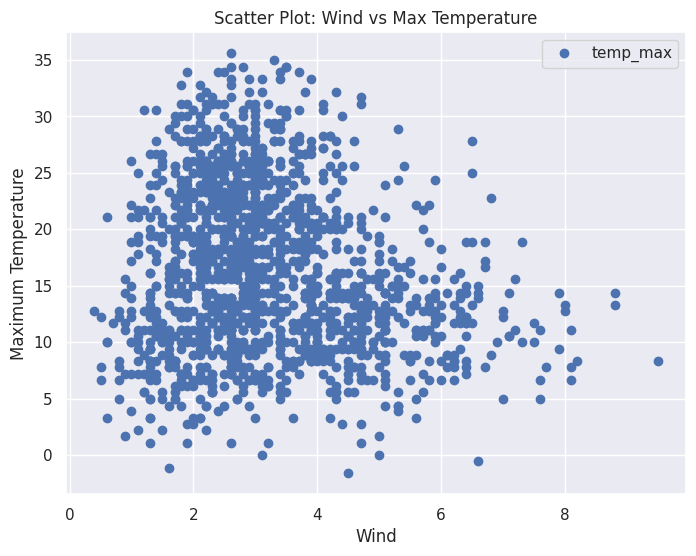

Pearson correlation coefficient: -0.16485663487495486
T-test p-value: 0.0


In [20]:
data.plot(x="wind", y="temp_max", style='o', figsize=(8, 6))
plt.xlabel("Wind")
plt.ylabel("Maximum Temperature")
plt.title("Scatter Plot: Wind vs Max Temperature")
plt.show()

pearson_corr = data["wind"].corr(data["temp_max"])
t_statistic, p_value = stats.ttest_ind(data["wind"], data["temp_max"])

print("Pearson correlation coefficient:", pearson_corr)
print("T-test p-value:", p_value)

<Axes: xlabel='temp_max'>

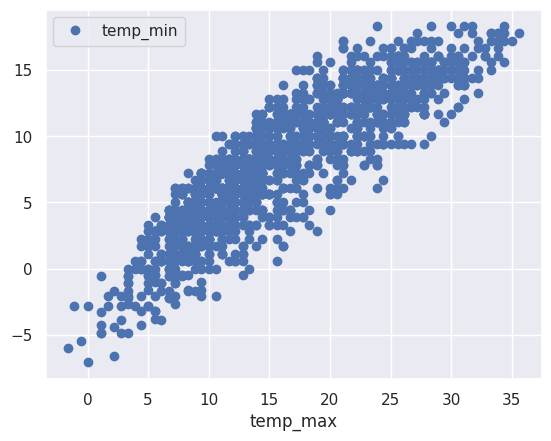

In [21]:
data.plot("temp_max","temp_min",style='o')

In [22]:
data.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

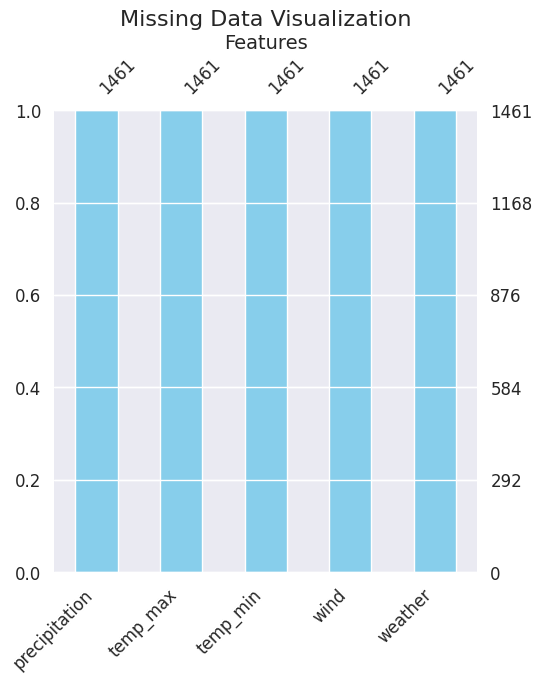

In [24]:
plt.figure(figsize=(12, 6))

ax = plt.subplot(1, 2, 2)

mso.bar(data.drop(["date"], axis=1), ax=ax, fontsize=12, color='skyblue')

plt.xlabel("Features", fontsize=14)
plt.ylabel("Percentage of Missing Values", fontsize=14)
plt.title("Missing Data Visualization", fontsize=16)

plt.show()

In [25]:
df=data.drop(["date"],axis=1)

Outlier removal

In [26]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [27]:
df.precipitation=np.sqrt(df.precipitation)
df.wind=np.sqrt(df.wind)

In [28]:
lc=LabelEncoder()
df["weather"]=lc.fit_transform(df["weather"])

In [29]:
features = ((df.loc[:, df.columns != "weather"]).astype(int)).values[:, :]
target = df["weather"].values

In [30]:
df.weather.unique()

array([0, 2, 4, 3, 1])

In [32]:
x=((df.loc[:,df.columns!="weather"]).astype(int)).values[:,0:]
y=df["weather"].values

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [34]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(x_test,y_test)*100))

KNN Accuracy:75.00%


In [35]:
svm=SVC()
svm.fit(x_train,y_train)
print("SVM Accuracy:{:.2f}%".format(svm.score(x_test,y_test)*100))

SVM Accuracy:77.42%


In [36]:
gbc=GradientBoostingClassifier(subsample=0.5,n_estimators=450,max_depth=5,max_leaf_nodes=25)
gbc.fit(x_train,y_train)
print("Gradient Boosting Accuracy:{:.2f}%".format(gbc.score(x_test,y_test)*100))

Gradient Boosting Accuracy:83.87%


In [37]:
import warnings
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train, y_train)

accuracy = xgb_classifier.score(x_test, y_test) * 100
print("XGBoost Accuracy: {:.2f}%".format(accuracy))

XGBoost Accuracy: 83.06%


In [39]:
input=[[1.140175,8.9,2.8,2.469818]]
ot=xgb_classifier.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("snow")
else:
    print("Sun")

The weather is:
Rain
